In [3]:
import numpy as np
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import imageio
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import os

In [2]:
#Generation of an Decompressed LHS image using LAsso technique
x_axis = imageio.imread('lhs.png', pilmode='L') # read in grayscale
x = spimg.zoom(x_axis, 0.2) #zoom for speed
ny,nx = x.shape

k = round(nx * ny * 0.5) #50% sample
ri = np.random.choice(nx * ny, k, replace=False) 
y = x.T.flat[ri] #y is the measured sample

psi = spfft.idct(np.identity(nx*ny), norm='ortho', axis=0) #my construction of psi

theta = psi[ri,:] #equivalent to phi*psi

lasso_reg = Lasso(alpha=0.001, max_iter=10000)
lasso_reg.fit(theta, y)

s = np.array(lasso_reg.coef_)
x_recovered = psi@s
x_recovered = x_recovered.reshape(nx, ny).T
x_recovered_final = x_recovered.astype('uint8') #recovered image is float64 and has negative values..

imageio.imwrite('lhs_recovered.jpg', x_recovered_final)

C:\Users\aniru\AppData\Local\Temp\ipykernel_22484\1901862567.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  x_axis = imageio.imread('lhs.png', pilmode='L') # read in grayscale


In [3]:
x_axis = imageio.imread('rhs.png', pilmode='L') # read in grayscale
x = spimg.zoom(x_axis, 0.2) #zoom for speed
ny,nx = x.shape

k = round(nx * ny * 0.5) #50% sample
ri = np.random.choice(nx * ny, k, replace=False) 
y = x.T.flat[ri] #y is the measured sample

psi = spfft.idct(np.identity(nx*ny), norm='ortho', axis=0) #my construction of psi

theta = psi[ri,:] #equivalent to phi*psi

lasso_reg = Lasso(alpha=0.001, max_iter=10000)
lasso_reg.fit(theta, y)

s = np.array(lasso_reg.coef_)
x_recovered = psi@s
x_recovered = x_recovered.reshape(nx, ny).T
x_recovered_final = x_recovered.astype('uint8') #recovered image is float64 and has negative values..

imageio.imwrite('rhs_recovered.jpg', x_recovered_final)

C:\Users\aniru\AppData\Local\Temp\ipykernel_22484\4158854377.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  x_axis = imageio.imread('rhs.png', pilmode='L') # read in grayscale


In [1]:
#Defining the compression ratios that will be used to plot the compressed images.
compression_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

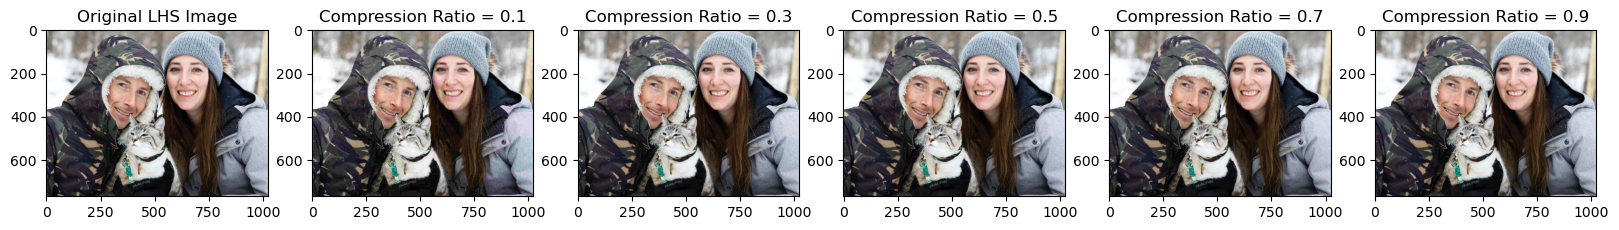

In [4]:

# Load the original image
img = Image.open("lhs.png")


# Create a figure to hold the subplots
fig, axs = plt.subplots(1, len(compression_ratios) + 1, figsize=(20, 5))

# Plot the original image
axs[0].imshow(img)
axs[0].set_title("Original LHS Image")

# Loop over the compression ratios
for i, compression_ratio in enumerate(compression_ratios):
    # Compress the image using the specified ratio
    buffer = BytesIO()
    img.save(buffer, format="JPEG", quality=int(compression_ratio*100))
    compressed_img = Image.open(buffer)

    # Decompress the image
    decompressed_img = Image.open(BytesIO(buffer.getvalue()))

    # Plot the decompressed image
    axs[i+1].imshow(decompressed_img)
    axs[i+1].set_title(f"Compression Ratio = {compression_ratio}")

# Show the plot
plt.show()

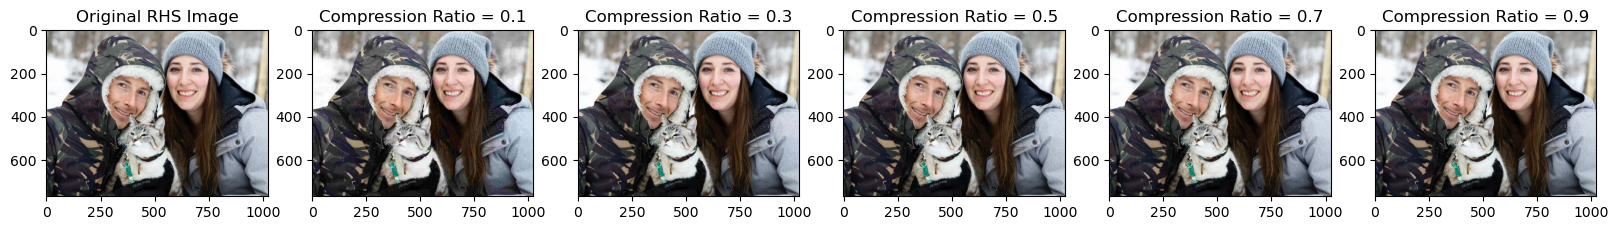

In [5]:
# Load the original image
img = Image.open("rhs.png")


# Create a figure to hold the subplots
fig, axs = plt.subplots(1, len(compression_ratios) + 1, figsize=(20, 5))

# Plot the original image
axs[0].imshow(img)
axs[0].set_title("Original RHS Image")

# Loop over the compression ratios
for i, compression_ratio in enumerate(compression_ratios):
    # Compress the image using the specified ratio
    buffer = BytesIO()
    img.save(buffer, format="JPEG", quality=int(compression_ratio*100))
    compressed_img = Image.open(buffer)

    # Decompress the image
    decompressed_img = Image.open(BytesIO(buffer.getvalue()))

    # Plot the decompressed image
    axs[i+1].imshow(decompressed_img)
    axs[i+1].set_title(f"Compression Ratio = {compression_ratio}")

# Show the plot
plt.show()